In [12]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
df = pd.read_excel("./xlsx/Join_data.xlsx", index_col = 0)    
df = df.set_index("DateTime")

# 대비 계산
df['대비_irs_1Y'] = df['1Y_Mid_irs'] - df['1Y_Mid_irs'].shift(1) 
df['대비_irs_2Y'] = df['2Y_Mid_irs'] - df['2Y_Mid_irs'].shift(1) 
df['대비_irs_3Y'] = df['3Y_Mid_irs'] - df['3Y_Mid_irs'].shift(1) 
df['대비_irs_5Y'] = df['5Y_Mid_irs'] - df['5Y_Mid_irs'].shift(1) 
df['대비_irs_10Y'] = df['10Y_Mid_irs'] - df['10Y_Mid_irs'].shift(1) 

df['대비_crs_1Y'] = df['1Y_Mid_crs'] - df['1Y_Mid_crs'].shift(1)
df['대비_crs_2Y'] = df['2Y_Mid_crs'] - df['2Y_Mid_crs'].shift(1)
df['대비_crs_3Y'] = df['3Y_Mid_crs'] - df['3Y_Mid_crs'].shift(1)
df['대비_crs_5Y'] = df['5Y_Mid_crs'] - df['5Y_Mid_crs'].shift(1)
df['대비_crs_10Y'] = df['10Y_Mid_crs'] - df['10Y_Mid_crs'].shift(1)

df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['대비_ndf'] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df['스왑포인트_1M'] = df["M1_스왑포인트"]/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]] 

# 결측치 제거
df_1 = df_1.dropna()                        

In [13]:
from sklearn.model_selection import train_test_split

# 쓸 칼럼만 남기고 feature, target 분리해 각각 x,y 에 저장
x = df_1[[ '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '스왑포인트_1M', '전일종가_ex', 
           '종가_NDF_차이']]
y = df_1[['종가_ex']]

# 이건 이렇게 해야 밑에 코드 8번째 줄 columns에 들어갈 수 있다고 하네요!
x.feature = x.columns 
x.feature

# scaling 진행
from sklearn.preprocessing import StandardScaler

# MinMaxScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,대비_swapbasis_1Y,대비_swapbasis_2Y,대비_swapbasis_3Y,대비_swapbasis_5Y,대비_swapbasis_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이
DateTime,,,,,,,,,,,,,,
2012-08-02,0.348741,1.544080,1.437744,1.627899,1.488363,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.625160,1.909409,-0.149841,-0.495597
2012-08-03,0.348741,0.286831,0.157058,-0.910410,-2.158344,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.125723,1.818881,-0.056232,-0.415698
2012-08-06,-0.350946,-0.873707,-0.803456,-1.091718,-0.832269,0.563566,0.160261,0.000879,0.000209,0.107465,0.123996,1.818881,-0.000426,0.423243
2012-08-07,0.173819,0.286831,-0.003027,-1.454333,-1.661066,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.125723,1.909409,-0.104837,0.003773
2012-08-08,-0.001103,-0.390150,-0.323199,-0.729102,-1.163788,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.125723,1.818881,-0.108437,-0.092772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.700790,-0.196727,-0.003027,-0.366487,-0.003472,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.625160,-0.896960,3.207485,0.213508
2022-07-26,0.348741,-0.196727,-0.003027,0.177437,0.162288,0.563566,-0.485246,-0.539435,-0.770625,0.107465,-0.000863,-0.987488,3.220086,0.183546
2022-07-27,0.348741,0.770388,0.797401,0.902668,0.825326,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.125723,-0.851696,3.110275,-0.189317


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor           Feature
0     3.152522   대비_swapbasis_1Y
1     5.907361   대비_swapbasis_2Y
2     2.407209   대비_swapbasis_3Y
3     4.767295   대비_swapbasis_5Y
4     3.269497  대비_swapbasis_10Y
5     1.830961          대비_국고_1Y
6     1.244140          대비_국고_3Y
7     5.803258          대비_국고_5Y
8     4.883202         대비_국고_10Y
9     1.024620          대비_통안_1Y
10    1.113948          대비_통안_2Y
11    1.184437          스왑포인트_1M
12    1.177857           전일종가_ex
13    1.018710         종가_NDF_차이


In [15]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:04:24   Log-Likelihood:                -7656.3
No. Observations:                2459   AIC:                         1.534e+04
Df Residuals:                    2444   BIC:                         1.543e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.110   1.03e+04      0.000    1134.678    1135.110
대비_swapbasis_1Y     -1.2901      0.196     -6.598      0.000      -1.674      -0.907
대비_swapbasis_2Y     -0.2013      0.268     -0.752      0.452      -0.726       0.324
대비_swapbasis_3Y     -0.1287      0.171     -0.753      0.451      -0.464       0.206
대비_swapbasis_5Y      0.1074      0.240      0.446      0.655      -0.364       0.579
대비_swapbasis_10Y     0.2865      0.199      1.439      0.150      -0.104       0.677
대비_국고_1Y            -0.0666      0.149     -0.447      0.655      -0.359       0.226
대비_국고_3Y            -0.3072      0.123     -2.501      0.012      -0.548      -0.066
대비_국고_5Y             0.5826      0.265      2.196      0.028       0.062       1.103
대비_국고_10Y           -0.2463      0.243     -1.012      0.312      -0.724       0.231
대비_통안_1Y            -0.0098      0.111     -0.088      0.930      -0.228       0.209
대비_통안_2Y             0.0857      0.116      0.737      0.461      -0.142       0.314
스왑포인트_1M            -0.2611      0.120     -2.179      0.029      -0.496      -0.026
전일종가_ex             55.3388      0.120    462.976      0.000      55.104      55.573
종가_NDF_차이           -0.9423      0.111     -8.477      0.000      -1.160      -0.724
==============================================================================
Omnibus:                      127.052   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.868
Skew:                           0.208   Prob(JB):                     1.20e-83
Kurtosis:                       4.885   Cond. No.                         6.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x_scaled.drop(['대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.300e+04
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:04:24   Log-Likelihood:                -7657.1
No. Observations:                2459   AIC:                         1.534e+04
Df Residuals:                    2447   BIC:                         1.541e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.110   1.03e+04      0.000    1134.678    1135.110
대비_swapbasis_1Y     -1.4221      0.142     -9.992      0.000      -1.701      -1.143
대비_swapbasis_10Y     0.2245      0.146      1.539      0.124      -0.062       0.511
대비_국고_1Y            -0.0585      0.149     -0.393      0.694      -0.350       0.233
대비_국고_3Y            -0.3019      0.123     -2.460      0.014      -0.543      -0.061
대비_국고_5Y             0.5949      0.265      2.246      0.025       0.075       1.114
대비_국고_10Y           -0.2544      0.243     -1.046      0.296      -0.731       0.222
대비_통안_1Y            -0.0107      0.111     -0.096      0.923      -0.229       0.208
대비_통안_2Y             0.0888      0.116      0.764      0.445      -0.139       0.317
스왑포인트_1M            -0.2620      0.120     -2.186      0.029      -0.497      -0.027
전일종가_ex             55.3374      0.119    463.128      0.000      55.103      55.572
종가_NDF_차이           -0.9439      0.111     -8.494      0.000      -1.162      -0.726
==============================================================================
Omnibus:                      126.607   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.936
Skew:                           0.214   Prob(JB):                     3.83e-82
Kurtosis:                       4.865   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor           Feature
0    1.670973   대비_swapbasis_1Y
1    1.756510  대비_swapbasis_10Y
2    1.814149          대비_국고_1Y
3    1.242209          대비_국고_3Y
4    5.785639          대비_국고_5Y
5    4.878547         대비_국고_10Y
6    1.113167          대비_통안_2Y
7    1.184366          스왑포인트_1M
8    1.177627           전일종가_ex
9    1.018550         종가_NDF_차이


In [18]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.531e+04
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:04:26   Log-Likelihood:                -7657.1
No. Observations:                2459   AIC:                         1.534e+04
Df Residuals:                    2448   BIC:                         1.540e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.110   1.03e+04      0.000    1134.678    1135.110
대비_swapbasis_1Y     -1.4221      0.142     -9.994      0.000      -1.701      -1.143
대비_swapbasis_10Y     0.2245      0.146      1.539      0.124      -0.062       0.511
대비_국고_1Y            -0.0597      0.148     -0.403      0.687      -0.350       0.231
대비_국고_3Y            -0.3020      0.123     -2.461      0.014      -0.543      -0.061
대비_국고_5Y             0.5944      0.265      2.245      0.025       0.075       1.114
대비_국고_10Y           -0.2544      0.243     -1.046      0.296      -0.731       0.222
대비_통안_2Y             0.0887      0.116      0.763      0.445      -0.139       0.316
스왑포인트_1M            -0.2620      0.120     -2.187      0.029      -0.497      -0.027
전일종가_ex             55.3373      0.119    463.242      0.000      55.103      55.572
종가_NDF_차이           -0.9439      0.111     -8.496      0.000      -1.162      -0.726
==============================================================================
Omnibus:                      126.541   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.714
Skew:                           0.213   Prob(JB):                     4.28e-82
Kurtosis:                       4.864   Cond. No.                         5.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x_scaled.drop(['대비_통안_2Y','대비_국고_1Y' ], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.166e+04
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:04:26   Log-Likelihood:                -7657.4
No. Observations:                2459   AIC:                         1.533e+04
Df Residuals:                    2450   BIC:                         1.539e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.110   1.03e+04      0.000    1134.678    1135.110
대비_swapbasis_1Y     -1.4224      0.142    -10.007      0.000      -1.701      -1.144
대비_swapbasis_10Y     0.2256      0.146      1.547      0.122      -0.060       0.512
대비_국고_3Y            -0.3050      0.121     -2.514      0.012      -0.543      -0.067
대비_국고_5Y             0.5841      0.249      2.346      0.019       0.096       1.072
대비_국고_10Y           -0.2561      0.243     -1.054      0.292      -0.733       0.221
스왑포인트_1M            -0.2626      0.120     -2.192      0.028      -0.497      -0.028
전일종가_ex             55.3338      0.119    465.049      0.000      55.101      55.567
종가_NDF_차이           -0.9444      0.111     -8.503      0.000      -1.162      -0.727
==============================================================================
Omnibus:                      126.544   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.939
Skew:                           0.213   Prob(JB):                     3.83e-82
Kurtosis:                       4.865   Cond. No.                         4.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
x_scaled.drop(['대비_국고_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.618e+04
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:04:27   Log-Likelihood:                -7658.0
No. Observations:                2459   AIC:                         1.533e+04
Df Residuals:                    2451   BIC:                         1.538e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.110   1.03e+04      0.000    1134.678    1135.110
대비_swapbasis_1Y     -1.4305      0.142    -10.078      0.000      -1.709      -1.152
대비_swapbasis_10Y     0.2375      0.145      1.633      0.102      -0.048       0.523
대비_국고_3Y            -0.3028      0.121     -2.496      0.013      -0.541      -0.065
대비_국고_5Y             0.3570      0.125      2.863      0.004       0.113       0.602
스왑포인트_1M            -0.2616      0.120     -2.184      0.029      -0.496      -0.027
전일종가_ex             55.3340      0.119    465.040      0.000      55.101      55.567
종가_NDF_차이           -0.9452      0.111     -8.510      0.000      -1.163      -0.727
==============================================================================
Omnibus:                      126.780   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.529
Skew:                           0.212   Prob(JB):                     1.05e-82
Kurtosis:                       4.872   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
x_scaled.drop(['대비_swapbasis_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.218e+04
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:04:28   Log-Likelihood:                -7659.3
No. Observations:                2459   AIC:                         1.533e+04
Df Residuals:                    2452   BIC:                         1.537e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1134.8939      0.110   1.03e+04      0.000    1134.678    1135.110
대비_swapbasis_1Y    -1.2854      0.111    -11.605      0.000      -1.503      -1.068
대비_국고_3Y           -0.3004      0.121     -2.476      0.013      -0.538      -0.062
대비_국고_5Y            0.3136      0.122      2.573      0.010       0.075       0.553
스왑포인트_1M           -0.2641      0.120     -2.205      0.028      -0.499      -0.029
전일종가_ex            55.3313      0.119    464.904      0.000      55.098      55.565
종가_NDF_차이          -0.9465      0.111     -8.520      0.000      -1.164      -0.729
==============================================================================
Omnibus:                      131.253   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.533
Skew:                           0.212   Prob(JB):                     2.37e-88
Kurtosis:                       4.939   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled

,대비_swapbasis_1Y,대비_국고_3Y,대비_국고_5Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이,종가_ex
DateTime,,,,,,,
2012-08-02,0.348741,-0.646622,-1.079749,1.909409,-0.149841,-0.495597,1131.7
2012-08-03,0.348741,-0.323869,-1.890219,1.818881,-0.056232,-0.415698,1134.8
2012-08-06,-0.350946,0.160261,0.000879,1.818881,-0.000426,0.423243,1129.0
2012-08-07,0.173819,-0.001116,0.000879,1.909409,-0.104837,0.003773,1128.8
2012-08-08,-0.001103,-0.323869,-0.539435,1.818881,-0.108437,-0.092772,1128.3
...,...,...,...,...,...,...,...
2022-07-25,-0.700790,-0.969375,-1.890219,-0.896960,3.207485,0.213508,1313.7
2022-07-26,0.348741,-0.485246,-0.539435,-0.987488,3.220086,0.183546,1307.6
2022-07-27,0.348741,-0.485246,-1.349905,-0.851696,3.110275,-0.189317,1313.3


In [23]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_swapbasis_1Y', '대비_국고_3Y', '대비_국고_5Y', '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이']
label_cols = ['종가_ex']

In [24]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1555, 1, 6), (389, 1, 6))

In [25]:
x_train

array([[[-1.10259799e-03,  1.45127400e+00,  3.78307527e+00,
         -1.39486408e+00,  1.01127176e+00,  8.19410217e-01]],

       [[ 4.98416973e+00, -1.62492286e-01,  2.71035799e-01,
         -1.07801602e+00,  1.70073867e+00,  4.06597669e-01]],

       [[ 5.23662910e-01, -1.11565786e-03,  8.78916251e-04,
          1.18518440e+00, -1.87620849e+00, -1.19405416e-01]],

       ...,

       [[ 8.73506582e-01, -1.62492286e-01, -5.39434849e-01,
         -1.34960007e+00,  4.31615498e-01, -1.19405416e-01]],

       [[-7.88250860e-01,  4.83014227e-01,  1.35166333e+00,
          1.77361651e+00, -1.33435590e+00, -4.82280963e-01]],

       [[ 3.48741074e-01,  1.60260970e-01,  1.08150645e+00,
         -1.39486408e+00, -1.15433843e+00,  3.03394532e-01]]])

In [26]:
test_feature, test_label = make_dataset(test_feature, test_label, 1)
test_feature.shape, test_label.shape

((513, 1, 6), (513, 1))

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM


# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일: 모델학습을 위한 학습과정 설정단계
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Accuracy: %.4f" % model.evaluate(x_valid, y_valid)) 

Epoch 1/200
87/98 [=========================>....] - ETA: 0s - loss: 1266726.1250 - mae: 1124.3702
Epoch 1: val_loss improved from inf to 1267311.00000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 12s 82ms/step - loss: 1266409.6250 - mae: 1124.2192 - val_loss: 1267311.0000 - val_mae: 1124.5833
Epoch 2/200
87/98 [=========================>....] - ETA: 0s - loss: 1264073.1250 - mae: 1123.1825
Epoch 2: val_loss improved from 1267311.00000 to 1265964.25000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 7s 71ms/step - loss: 1265444.5000 - mae: 1123.7876 - val_loss: 1265964.2500 - val_mae: 1123.9807
Epoch 3/200
87/98 [=========================>....] - ETA: 0s - loss: 1262301.8750 - mae: 1122.3762
Epoch 3: val_loss improved from 1265964.25000 to 1263379.62500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 7s 68ms/step -

17/17 [==============================] - 0s 5ms/step


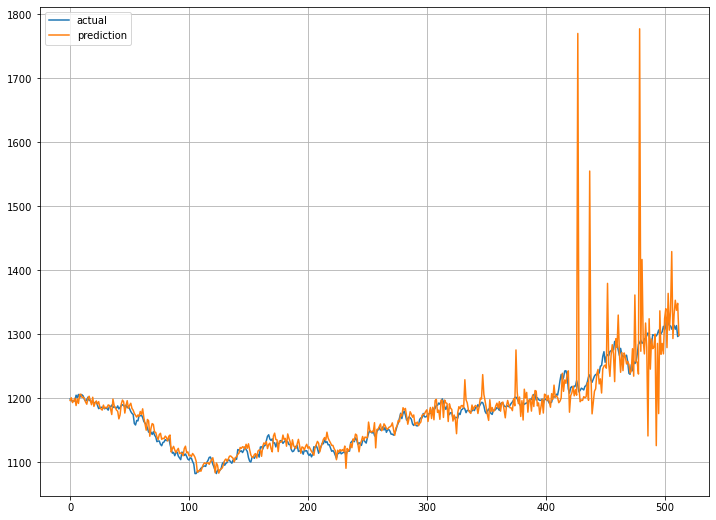

In [29]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend()